# Imports

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid', {'legend.frameon':True})

# Loads

In [49]:
df_train = pd.read_csv('csv/train.csv', encoding='utf-8')
df_test = pd.read_csv('csv/test.csv', encoding='utf-8')

In [50]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [51]:
print(',not_null,not_null_pc,unique,not_null,not_null_pc,unique')
for col in df_train.columns:
    msg = col
    not_null = df_train[df_train[col].isnull() == False]
    msg += ',%s,%s,%s'%(len(not_null), np.round(len(not_null) / len(df_train) * 100, 2), len(df_train[col].unique()))
    if col in df_test.columns:
        not_null = df_test[df_test[col].isnull() == False]
        msg += ',%s,%s,%s'%(len(not_null), np.round(len(not_null) / len(df_test) * 100, 2), len(df_test[col].unique()))
    print(msg)

,not_null,not_null_pc,unique,not_null,not_null_pc,unique
PassengerId,891,100.0,891,418,100.0,418
Survived,891,100.0,2
Pclass,891,100.0,3,418,100.0,3
Name,891,100.0,891,418,100.0,418
Sex,891,100.0,2,418,100.0,2
Age,714,80.13,89,332,79.43,80
SibSp,891,100.0,7,418,100.0,7
Parch,891,100.0,7,418,100.0,8
Ticket,891,100.0,681,418,100.0,363
Fare,891,100.0,248,417,99.76,170
Cabin,204,22.9,148,91,21.77,77
Embarked,889,99.78,4,418,100.0,3


In [52]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Work on name

## Parse

In [54]:
def parse_name(df):
    df['Surname'] = df['Name'].apply(lambda x:x.split(',')[0])
    df['Title'] = df['Name'].apply(lambda x:x.split(',')[1].split('.')[0])

In [55]:
parse_name(df_train)
parse_name(df_test)

In [56]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr


In [57]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Wirz,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,Mrs


## Work on Title

In [58]:
df_train['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Capt              1
 Ms                1
 Sir               1
 the Countess      1
 Jonkheer          1
 Mme               1
 Don               1
 Lady              1
Name: Title, dtype: int64

In [59]:
df_test['Title'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dona        1
 Dr          1
Name: Title, dtype: int64

In [60]:
df_train.groupby(['Title'])['Sex'].value_counts()

Title          Sex   
 Capt          male        1
 Col           male        2
 Don           male        1
 Dr            male        6
               female      1
 Jonkheer      male        1
 Lady          female      1
 Major         male        2
 Master        male       40
 Miss          female    182
 Mlle          female      2
 Mme           female      1
 Mr            male      517
 Mrs           female    125
 Ms            female      1
 Rev           male        6
 Sir           male        1
 the Countess  female      1
Name: Sex, dtype: int64

<BarContainer object of 17 artists>

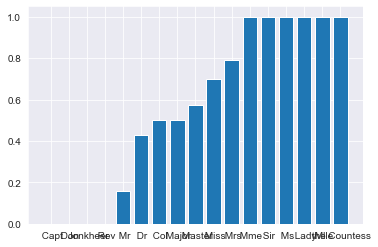

In [61]:
tmp = df_train.groupby(['Title'])['Survived'].mean().sort_values()
plt.bar(tmp.index, tmp.values)

Title
 Miss            0.697802
 Mrs             0.792000
 Dr              1.000000
 Lady            1.000000
 Mlle            1.000000
 Mme             1.000000
 Ms              1.000000
 the Countess    1.000000
Name: Survived, dtype: float64


<BarContainer object of 8 artists>

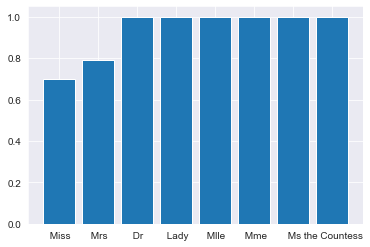

In [62]:
tmp = df_train[df_train['Sex'] == 'female'].groupby(['Title'])['Survived'].mean().sort_values()
print(tmp)
plt.bar(tmp.index, tmp.values)

In [63]:
df_train.groupby(['Pclass', 'Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

In [65]:
import plotly.express as px
df_train['Survived'] = df_train['Survived'].map({0:'died', 1:'survived'})
fig = px.histogram(df_train, x="Family", color='Survived').update_xaxes(categoryorder='total descending')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Surname', 'Title'] but received: Family